# **아파트 실거래가 예측 프로젝트**


## **Stage 6	인사이트 도출 - 사람들이 선호하는 아파트는?**
<img src='http://drive.google.com/uc?export=view&id=1a0_ofQLehKLINRG8LM5jztkCwkjStz07' /><br>


## **INTRO**
지난 스테이지 **Stage 5. 모델링의 활용 - <font color="blue">HOW</font> 어떻게 아파트 가격을 예측할까?** 에서 시계열 머신러닝, 딥러닝 모델로 시계열 특징을 파악하고, Light BGM 튜닝으로 최적 모델을 얻었습니다 😀     

예측 모델로 **직접 아파트 실거래가를 예측**하는데 사용할 수 있을뿐만 아니라,     
**아파트 실거래가에 대한 다양한 인사이트를 도출**할 수 있습니다 😎    

마지막 스테이지는 지금까지 학습한 모델을 분석하고,    
프로젝트 데이터(COVID-19 이전)과 COVID-19 이후 데이터를 비교하며 인사이트를 도출할 예정입니다. 

먼저, 한글 폰트를 설정하기 위한 약간의 준비를 하겠습니다!
한글 폰트를 다운로드하고, 적용하는 코드입니다.

In [ ]:
# 폰트 설정
# 1. 한글 폰트 다운로드 및 환경 구성
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [ ]:
import matplotlib.pyplot as plt

# 2. 나눔바른고딕 한글 폰트로 적용
plt.rc('font', family='NanumBarunGothic')

### **1. 아파트 가격 예측에 결정적인 변수 조사**
Light BGM 학습 결과로 얻은 변수별 중요도 그래프를 다시 한 번 보실까요?

아파트 가격 예측에 영향을 마치는 변수는 다음과 같았습니다!

<img src='http://drive.google.com/uc?export=view&id=1PS_zCFJ7-p2-8mrpIVMAniDu7JPitssQ' /><br>

전용면적과, 건물 나이, 전세 가격, 인구밀도의 영향이 크게 나타나네요~    
COVID-19 이후에도 동일한 변수가 영향이 있었는지 확인해볼까요?     
바로 시작하겠습니다! 

### **2. COVID-19 이전/이후 사람들의 아파트 선호 요인 파악**

#### 2-1. COVID-19 이후 사람들의 아파트 선호 요인
COVID-19 이후 영향을 파악하려면, COVID-19 이후 데이터가 있어야겠죠?    
COVID-19 이후 아파트 실거래가 데이터는 [국토교통부 실거래가 공개시스템](http://rt.molit.go.kr/)에서 구할 수 있습니다!    
먼저, COVID-19 이후 아파트 실거래가 데이터와 외부데이터를 불러와볼까요?    
Stage3에서 진행했던 외부데이터 병합과 동일하게 진행되니, 자세한 설명은 Stage3을 참고해주세요~ 


In [ ]:
import pandas as pd

In [ ]:
park = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/dacon/park.csv')
day_care_center = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/dacon/day_care_center.csv')

Mounted at /content/drive


In [ ]:
df_2020 = pd.read_csv('https://raw.githubusercontent.com/0525hhgus/DaCrew4_MonthCrew/main/data/new_data/apartment_price_seoul_2020.csv', skiprows=15, encoding='cp949')
df_2021 = pd.read_csv('https://raw.githubusercontent.com/0525hhgus/DaCrew4_MonthCrew/main/data/new_data/apartment_price_seoul_2021.csv', skiprows=15, encoding='cp949')
df_2022 = pd.read_csv('https://raw.githubusercontent.com/0525hhgus/DaCrew4_MonthCrew/main/data/new_data/apartment_price_seoul_2022.csv', skiprows=15, encoding='cp949')

##### **Inst.**
판다스의 concat() 함수로 2020~2022년도 데이터를 하나로 합칠 수 있어요!    
1. concat 함수를 이용하여 2021,2022년도 데이터를 병합하세요

In [ ]:
# 1. concat 함수를 이용하여 2021,2022년도 데이터를 병합하세요


##### **Hint.**
- concat 함수는 input으로 병합할 데이터와 axis를 설정해야해요
- axis=0이면 세로로 데이터가 병합되며 axis=1이면 가로로 데이터가 병합돼요.

##### **Solution.**

In [ ]:
# 1. concat 함수를 이용하여 2021,2022년도 데이터를 병합하세요
df_covid = pd.concat([df_2020, df_2021], axis=0)
df_covid = pd.concat([df_covid, df_2022], axis=0)

In [ ]:
# 병합된 데이터 확인
df_covid.head()

데이터가 잘 들어왔는데... 기존 실거래가 데이터와 많이 다른 것 같아요 😢    
기존 데이터와 컬럼이 동일하게 맞춰줍시다!

In [ ]:
df_covid = df_covid.drop(['번지', '본번', '부번', '단지명', '도로명', '해제사유발생일', '거래유형', '중개사소재지'], axis=1)
df_covid['시군구'] = df_covid['시군구'].apply(lambda x: x.split()[2])
df_covid.head()

,시군구,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도
0,개포동,77.75,202006,23,"149,500",4,1988.0
1,개포동,54.98,202002,24,"144,000",4,1987.0
2,개포동,79.97,202006,18,"162,750",4,1987.0
3,개포동,79.97,202006,20,"160,000",5,1987.0
4,개포동,79.97,202006,22,"150,000",2,1987.0


컬럼 이름까지 동일하게 맞춰주는 것을 잊지마세요~

In [ ]:
df_covid.columns = ['dong', 'exclusive_use_area', 'transaction_year_month', 'transaction_date', 'transaction_real_price', 'floor', 'year_of_completion']
df_covid.head()

,dong,exclusive_use_area,transaction_year_month,transaction_date,transaction_real_price,floor,year_of_completion
0,개포동,77.75,202006,23,"149,500",4,1988.0
1,개포동,54.98,202002,24,"144,000",4,1987.0
2,개포동,79.97,202006,18,"162,750",4,1987.0
3,개포동,79.97,202006,20,"160,000",5,1987.0
4,개포동,79.97,202006,22,"150,000",2,1987.0


이제 Stage3의 외부데이터 병합 과정과 같이    
load_other_data() 함수로 외부데이터를 불러오고, mapping_other_data() 함수로 데이터를 병합해봅시다!

In [ ]:
import re

In [ ]:
# 외부데이터 데이터 폴더 경로
data_dir = 'https://raw.githubusercontent.com/0525hhgus/DaCrew4_MonthCrew/main/data/other_2018/'

def load_other_data(data_dir):

    # 법정동 데이터
    mapping_data = pd.read_csv(data_dir+'KIKcd_B.20171226.csv', encoding='utf-8')
    mapping_data = mapping_data[mapping_data['시도명'] == '서울특별시']

    # 인구 밀도 데이터
    population = pd.read_csv(data_dir+'population_20230219223611.csv', encoding='utf-8').drop(['항목', '합계'], axis=1)
    population.set_index('시점', inplace=True)

    # 한국은행 기준금리 데이터
    df_ir = pd.read_csv(data_dir+'KORBANK_200801-202212.csv')
    df_ir['변환'].replace('/', '', regex=True, inplace=True)
    df_ir['변환'] = df_ir['변환'].astype('int')
    df_ir.set_index('변환', inplace=True)

    # 구시군의회의원선거 데이터
    party_2014 = pd.read_excel(data_dir+"party/7_vote_party_seoul.xlsx", engine = "openpyxl")
    party_2014.columns = ['구시군명', '선거구명', '총당선인수', '더불어민주당',
                            '자유한국당', 'Unnamed: 5', '바른미래당', '민주평화당', '정의당',
                            '민중당', '무소속']
    party_2014 = party_2014[['구시군명', '총당선인수', '자유한국당', '더불어민주당', '바른미래당', '민주평화당', '정의당','민중당', '무소속']][5:]
    party_2014 = party_2014[party_2014['구시군명']!='  '].replace(' ', '', regex=True)
    party_2014.set_index('구시군명', inplace=True)

    party_2014 = party_2014.astype('int')

    # 전세 가격지수 데이터
    jeonse = pd.read_csv(data_dir+'jeonse_200801-202212.csv', encoding='cp949').drop(['항목', '단위'], axis=1)[:26] 
    raw_col = jeonse.columns
    jeonse.columns = [raw_col[0]] + [ int(re.sub(r"[^0-9]", "", col)) for col in raw_col[1:] ]
    jeonse.set_index('행정구역별', inplace=True)

    # 역세권-서울지하철 데이터
    station = pd.read_csv(data_dir+'subway_seoul.csv', encoding='cp949')
    station = station[station['지번주소'].str.contains('서울특별시')]
    station["구"] = station["지번주소"].apply(lambda x: x.split()[1])

    # 자율형사립고 데이터
    school = pd.read_csv(data_dir+'school_20230219222440.csv')[2:]
    school = school.replace('-', 0)
    school = school.astype('int')
    school.set_index('시점', inplace=True)

    return mapping_data, population, df_ir, party_2014, jeonse, station, school

In [ ]:
mapping_data, population, df_ir, party_2014, jeonse, station, school = load_other_data(data_dir)

In [ ]:
def mapping_other_data(df): # df는 train 또는 test 데이터 입력
    # 서울특별시 데이터만 추출
    # df = df[df['city'] == '서울특별시']

    # 법정동 매핑
    print("[START] 법정동 매핑")
    df = pd.merge(df, mapping_data, how='left', left_on='dong', right_on='읍면동명').drop(['동리명', '생성일자', '말소일자'], axis=1)
    print("[END] 법정동 매핑")
    

    # 인구밀도 매핑
    print("[START] 인구밀도 매핑")
    def mapping_year_gu_population(x):
        year = x['transaction_year_month']//100
        return population[x['시군구명']].loc[year]
    
    df['인구밀도'] = df.apply(mapping_year_gu_population, axis=1)
    print("[END] 인구밀도 매핑")

    # 한국은행 기준금리 매핑
    print("[START] 기준금리 매핑")
    df['기준금리'] = df['transaction_year_month'].apply(lambda x: df_ir.loc[x, :][0])
    print("[END] 기준금리 매핑")

    # 구시군의회의원선거 매핑
    print("[START] 구시군의회의원선거 매핑")
    def mapping_year_gu_party(x):            
        # 우, 좌, 기타
        return [ party_2014.loc[x['시군구명']]['자유한국당'], party_2014.loc[x['시군구명']]['더불어민주당'], sum(party_2014.loc[x['시군구명']][2:])]

    df_party = pd.DataFrame(list(df.apply(mapping_year_gu_party, axis=1)), columns=['정당_우', '정당_좌', '정당_기타'])
    df = pd.concat([df,df_party], axis=1)
    print("[END] 구시군의회의원선거 매핑")

    # 전세 가격지수 매핑
    print("[START] 전세가격지수 매핑")
    def mapping_year_month_gu_jeonse(x):
        year = x['transaction_year_month']
        return jeonse.loc[x['시군구명']][year]

    df['jeonse'] = df.apply(mapping_year_month_gu_jeonse, axis=1)
    print("[END] 전세가격지수 매핑")

    # 역세권(지하철 역 개수) 매핑
    print("[START] 지하철 데이터 매핑")
    num_station = station["구"].value_counts()
    df['num_station'] = df["시군구명"].apply(lambda x: num_station[x])
    print("[END] 지하철 데이터 매핑")

    # 자율형사립고 데이터 매핑
    print("[START] 자율형사립고 데이터 매핑")
    def mapping_year_gu_school(x):
        year = 2021 if x['transaction_year_month']//100 > 2021 else x['transaction_year_month']//100 
        return school.loc[year][x['시군구명']]
    def mapping_year_gu_alumni(x):
        year = 2021 if x['transaction_year_month']//100 > 2021 else x['transaction_year_month']//100 
        return school.loc[year][x['시군구명']+'.1']

    df['num_school'] = df.apply(mapping_year_gu_school, axis=1)
    df['num_alumni'] = df.apply(mapping_year_gu_alumni, axis=1)
    print("[END] 자율형사립고 데이터 매핑")

    # 공원 데이터 매핑
    print("[START] 공원 데이터 매핑")
    park_new= park[park['city']=='서울특별시']
    park_temp = park_new['gu'].value_counts()
    park_number = pd.DataFrame(park_temp)
    park_number.reset_index(inplace=True)
    park_number.columns = ['구','number']

    df_park_gu = pd.DataFrame({'구' : ['마포구', '성북구'], 'number' : ['193', '226']})
    park_number= park_number.append(df_park_gu, ignore_index = True)

    park_number['number'] = park_number['number'].astype(int) 
    park_number.set_index('구', inplace=True)
    
    def park_number_find(a):
        position = a['시군구명']
        return park_number.loc[position]['number']
        
    df['park_number'] = df.apply(park_number_find,axis=1)
    print("[END] 공원 데이터 매핑")

    # 어린이집 데이터 매핑
    print("[START] 어린이집 데이터 매핑")
    center_new= day_care_center[day_care_center['city']=='서울특별시']
    center_temp = center_new['gu'].value_counts()
    center_number = pd.DataFrame(center_temp)
    center_number.rename(columns={'gu':'number'})

    center_number.reset_index(inplace=True)
    center_number.columns = ['시군구명' ,'number']

    df_center_gu = pd.DataFrame({'시군구명' : ['용산구', '성북구','마포구','동대문구'], 'number' : ['36', '87','85','77']})
    center_number= center_number.append(df_center_gu, ignore_index = True)
    center_number.set_index('시군구명', inplace=True)

    def center_number_find(a):
        position = a['시군구명']
        return center_number.loc[position]['number']

    df['center_number'] = df.apply(center_number_find,axis=1)
    print("[END] 어린이집 데이터 매핑")
    
    # 날짜 전처리(기간의 평균 -> 연월일)
    def generate_data(x):
        return int(str(x['transaction_year_month'])+str(x['transaction_date']))
    df['transaction_ymd'] = df.apply(generate_data, axis=1)

    def old_apartment(x):
        return x['transaction_year_month']//100-x['year_of_completion']
    df['life_of_apartment'] = df.apply(old_apartment, axis=1)

    return df

In [ ]:
df_train = mapping_other_data(df_covid)

[START] 법정동 매핑
[END] 법정동 매핑
[START] 인구밀도 매핑
[END] 인구밀도 매핑
[START] 기준금리 매핑
[END] 기준금리 매핑
[START] 구시군의회의원선거 매핑
[END] 구시군의회의원선거 매핑
[START] 전세가격지수 매핑
[END] 전세가격지수 매핑
[START] 지하철 데이터 매핑
[END] 지하철 데이터 매핑
[START] 자율형사립고 데이터 매핑
[END] 자율형사립고 데이터 매핑
[START] 공원 데이터 매핑
[END] 공원 데이터 매핑
[START] 어린이집 데이터 매핑
[END] 어린이집 데이터 매핑


데이터 형식도 기존 데이터와 동일하게 맞춰줄게요.

In [ ]:
df_train['transaction_real_price'].replace(',', '', regex=True, inplace=True)

df_train['center_number'] = df_train['center_number'].astype(int)
df_train['transaction_real_price'] = df_train['transaction_real_price'].astype(float)

사용하지 않는 컬럼은 제거하고, csv 파일로 저장해줍시다!

In [ ]:
drop_col = ['transaction_year_month', '법정동코드','시도명', '읍면동명', 'year_of_completion', 'transaction_date']
df_train = df_train.drop(drop_col, axis=1)

In [ ]:
df_train.to_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/after_covid_data.csv', index=False)

잘 저장된 파일을 다시 불러와볼까요?

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/after_covid_data.csv') 

불필요한 컬럼을 다시 삭제할게요.

In [ ]:
drop_col = ['dong', '시군구명', 'transaction_ymd']
df_train = df_train.drop(drop_col, axis=1)

모델 학습에 사용할 머신러닝 라이브러리를 불러옵니다.

In [ ]:
# 머신러닝 모델 학습 관련 라이브러리
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit

# RSME 성능평가 계산을 위한 라이브러리
from sklearn.metrics import mean_squared_error

# 프로그램 진행상황을 그림으로 볼 수 있게 해주는 파이썬 라이브러리
from tqdm import tqdm
from sklearn.model_selection import train_test_split

train, validation, test 데이터셋으로 나누고, 기존 모델 학습 전처럼 데이터 스케일링 작업도 진행할게요.

In [ ]:
cut = int(len(df_train)*0.9)
h_train = df_train[:cut]
h_test = df_train[cut:]
h_test_X = h_test.drop('transaction_real_price', axis=1)
h_test_y = h_test['transaction_real_price']

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

rbs = RobustScaler()
rbs.fit(h_train[['exclusive_use_area', '인구밀도']])

h_train[['exclusive_use_area', '인구밀도']] = rbs.transform(h_train[['exclusive_use_area', '인구밀도']])
h_test_X[['exclusive_use_area', '인구밀도']] = rbs.transform(h_test_X[['exclusive_use_area', '인구밀도']])

mms_col = df_train.columns
mms_col = mms_col.drop(['transaction_real_price', 'life_of_apartment', 'floor'])
mms_col

mms = MinMaxScaler()
mms.fit(h_train[mms_col])
h_train[mms_col] = mms.transform(h_train[mms_col])
h_test_X[mms_col] = mms.transform(h_test_X[mms_col])

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
h_train_X, h_valid_X, h_train_y, h_valid_y = train_test_split(h_train.drop('transaction_real_price', axis=1), h_train['transaction_real_price'], test_size=0.2, random_state=42)

In [ ]:
print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape, h_test_X.shape, h_test_y.shape)

(103260, 14) (103260,) (25816, 14) (25816,) (14342, 14) (14342,)


데이터가 잘 만들어졌군요!    

여기서 잠깐! COVID-19 이전 데이터로 학습된 기존 모델로도 COVID-19 이후 데이터를 잘 예측하는지 확인해볼까요?    
load_model로 기존 모델을 불러와봅시다.

In [ ]:
import joblib

load_model = joblib.load('/content/drive/MyDrive/데이크루4기_먼스크루/model/lgb_final_model.pkl')

성능평가를 위한 RMSE 함수를 다시 선언해줄게요.

In [ ]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

predict() 함수로 값을 예측하고, RMSE() 함수로 평가 결과를 확인해봅시다!

In [ ]:
load_lgb_pred = load_model.predict(h_train_X)
RMSE(h_train_y, load_lgb_pred)

52785.77526052767

##### **Inst.**
코로나 이전 데이터로 평가했을 때는 18706점이었는데, 52785점으로 점수가 크게 떨어졌네요 😢    
코로나 이전 이후 많은 변화가 있었나봅니다 🤔  

이제, 코로나 이후 데이터로 코로나 이전 학습 모델과 동일한 파라미터를 사용하여 Light BGM을 학습해봅시다!    
코로나 이전 학습의 모델의 파라미터는 trial_params에 입력해두었어요.   
LGBMRegressor()로 모델을 생성하고, fit() 함수로 모델을 학습해볼까요?     
1. 변수 covid_lgb_model에 lgb.LGBMRegressor()을 사용하여 모델을 생성하세요. (단, parameter는 trial_params를 사용해요.
2. 생성된 모델에 주어진 데이터를 fit 하세요.

In [ ]:
# 코로나 이전 학습 모델과 동일한 파라미터 사용
trial_params = {'max_depth': 14, 'learning_rate': 0.009990560009908885, 'n_estimators': 2915, 'min_child_samples': 23, 'subsample': 0.586428406286942}

In [ ]:
# 1. 변수 covid_lgb_model에 lgb.LGBMRegressor()을 사용하여 모델을 생성하세요. (단, parameter는 trial_params를 사용해요.


LGBMRegressor(learning_rate=0.009990560009908885, max_depth=14,
              min_child_samples=23, n_estimators=2915,
              subsample=0.586428406286942)

In [ ]:
# 2. 생성된 모델에 주어진 데이터를 fit 하세요. (단, verbose=0, early_stopping_rounds=25으로 설정하세요.)


##### **Hint.**
- trial_params를 쓰기 위해서는 **을 사용해야 해요.
- fit을 위해서는 eval_set과 verbose, early_stopping_rounds을 설정해야 해요.

##### **Solution**

In [ ]:
# 1. 변수 covid_lgb_model에 lgb.LGBMRegressor()을 사용하여 모델을 생성하세요. (단, parameter는 trial_params를 사용해요.
covid_lgb_model = lgb.LGBMRegressor(**trial_params)

In [ ]:
# 2. 생성된 모델에 주어진 데이터를 fit 하세요.
covid_lgb_model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)

In [ ]:
# fit한 모델의 성능을 확인해봐요
covid_lgb_pred = covid_lgb_model.predict(h_test_X)
RMSE(h_test_y, covid_lgb_pred)

34903.35777445478

성능은 34903으로 많이 아쉽네요 😢    
Stage5의 튜닝을 사용하면 더 좋은 모델이 될 것 같아요!

#### 2-2. COVID-19 이전/이후 사람들의 아파트 선호 요인 시각화
코로나 이후 데이터로 학습한 모델에서 변수별 중요도를 확인해봅시다!


<BarContainer object of 14 artists>

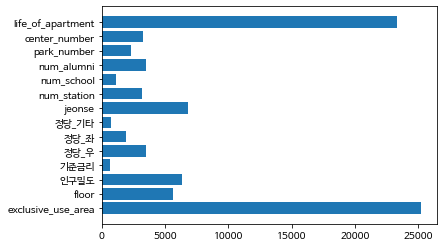

In [ ]:
plt.barh(h_train_X.columns, covid_lgb_model.feature_importances_)

코로나 전 중요 변수와 비교해볼까요?

<img src='http://drive.google.com/uc?export=view&id=1PS_zCFJ7-p2-8mrpIVMAniDu7JPitssQ' /><br>


기준금리의 중요도가 감소한 것으로 보이네요!    
저금리로 인해 금리의 영향이 약해진 것 같아요...  
아파트 나이의 중요도는 증가했군요!      
기회가 된다면, 코로나와 직접적으로 연관된 다른 외부데이터를 사용해서 파악해보면 좋겠어요~

상관관계에도 변화가 있을지 확인해봅시다!    
코로나 이전 데이터를 before_covid로 불러오고, 불필요한 컬럼을 제거해줍시다.    

In [ ]:
# 외부데이터 결합한 데이터
before_covid = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/train_with_other_data.csv')

drop_col = ['dong', '시군구명', 'transaction_ymd']
before_covid = before_covid.drop(drop_col, axis=1)

상관관계 분석에 사용할 컬럼만 cont_col에 선언해줄게요.

In [ ]:
cont_col = ['exclusive_use_area', 'floor', 'life_of_apartment',
       'transaction_real_price', '인구밀도', '기준금리', '정당_우', '정당_좌', '정당_기타',
       'jeonse', 'num_station', 'num_school', 'num_alumni', 'park_number',
       'center_number']

##### **Inst.**
아파트 실거래가(transaction_resal_price)에 대한 상관관계만 뽑아서,    
상관관계 절대값의 내림차순으로 정렬해볼까요? 😃  
1. 코로나 전 상관관계를 내림차순으로 보여주세요.
2. 코로나 후 상관관계를 내림차순으로 보여주세요.

In [ ]:
# 1. 코로나 전 상관관계를 내림차순으로 보여주세요.


In [ ]:
# 2. 코로나 후 상관관계를 내림차순으로 보여주세요.


##### **Hint.**
- 상관관계는 corr() 함수를 이용해요.
- 내림차순은 sort_values()를 이용해요.
- 상관관계는 음수의 값도 가지기 때문에 양수로 표현하기 위해서 lambda를 활용하여 abs()를 이용해요.

##### **Solution**

In [ ]:
# 1. 코로나 전 상관관계를 내림차순으로 보여주세요.
before_covid[cont_col].corr()['transaction_real_price'].sort_values(key=lambda x: abs(x), ascending=False)

transaction_real_price    1.000000
exclusive_use_area        0.668721
num_alumni                0.369851
num_school                0.363723
num_station               0.325297
정당_우                      0.258052
park_number               0.242310
인구밀도                     -0.221540
floor                     0.141762
기준금리                     -0.138458
center_number            -0.135667
jeonse                    0.116803
정당_좌                     -0.082203
정당_기타                    -0.078672
life_of_apartment         0.045172
Name: transaction_real_price, dtype: float64

In [ ]:
# 2. 코로나 후 상관관계를 내림차순으로 보여주세요.
df_train[cont_col].corr()['transaction_real_price'].sort_values(key=lambda x: abs(x), ascending=False)

transaction_real_price    1.000000
exclusive_use_area        0.632999
num_alumni                0.400911
num_school                0.370945
num_station               0.329573
정당_우                      0.235141
park_number               0.232869
floor                     0.195819
인구밀도                     -0.190569
center_number            -0.136834
정당_좌                     -0.086986
정당_기타                    -0.085632
jeonse                    0.064023
기준금리                     -0.047043
life_of_apartment         0.008193
Name: transaction_real_price, dtype: float64

전용면적에 대한 양의 상관관계가 약해졌네요~       
자율형사립고등학교 수와 졸업생 수에 관한 학군과의 양의 상관관계는 더 강해졌습니다!    
코로나로 교육 격차가 심해지면서 학군의 중요성이 더욱 부각된 것 같아요 🤔     
다양한 해석이 나올 수 있는 결과군요!

### **3. 금리 및 부동산 정책과의 연관성**

#### 3-1. 금리와의 연관성
앞서 우리는 시계열 데이터를 통해서, 다양한 데이터를 추가하여 아파트 실거래가 예측을 했습니다!    
흔히 언급되는 금리와 아파트 실거래가는 어떤 영향이 있는지 직접 그래프로 확인해보실까요?


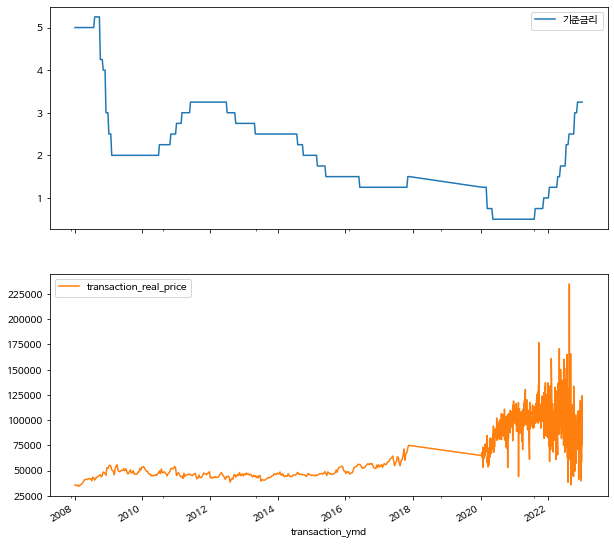

In [ ]:
df_time[['기준금리', 'transaction_real_price']].plot(subplots=True, figsize = (10,10))
plt.show()

금리가 내려가면, 실거래가가 올라가고    
금리가 올라가면, 실거래가가 내려가는 음의 상관관계가 잘 보이네요!    
다만, COIVD-19 이후로 금리는 올랐지만, 실거래가가 예측하기 어렵게 나타나네요 😢

#### 3-2. 부동산 정책과의 연관성
하지만, 해당 금리만으로 설명하기 어려운 부분이 많네요 😢   
그러면 실거래가 데이터를 직접 눈으로 확인해볼까요? 


In [ ]:
# 외부데이터 결합한 데이터
before_covid = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/train_with_other_data.csv')
after_covid = pd.read_csv('/content/drive/MyDrive/데이크루4기_먼스크루/data/data+other/after_covid_data.csv')

df_time = pd.concat([before_covid, after_covid], axis=0)
df_time = df_time[df_time['transaction_ymd'] > 20000000] # 이상치 날짜를 제거했습니다.

In [ ]:
feature_col = df_time.columns
feature_col = feature_col.drop(['transaction_ymd'])

df_time = df_time.groupby('transaction_ymd')[feature_col].mean().reset_index()
df_time['transaction_ymd'] = pd.to_datetime(df_time['transaction_ymd'].astype('str'))
df_time = df_time.sort_values(by=['transaction_ymd'])
df_time = df_time.set_index('transaction_ymd')
df_time.head()

,exclusive_use_area,floor,transaction_real_price,인구밀도,기준금리,정당_우,정당_좌,정당_기타,jeonse,num_station,num_school,num_alumni,park_number,center_number,life_of_apartment
transaction_ymd,,,,,,,,,,,,,,,
2008-01-05,71.327958,8.538795,35853.846989,18535.429192,5.0,5.888768,9.465003,10.151384,53.704319,10.448182,0.957678,423.636462,57.284862,302.640260,11.307651
2008-01-15,71.180564,8.433262,35229.293326,18650.262648,5.0,5.792250,9.231970,9.911733,53.986401,10.185684,0.942411,423.603875,51.562971,286.076426,11.674919
2008-01-26,71.533814,8.317531,34880.796512,18673.910107,5.0,5.852415,9.328265,9.958855,53.977647,10.119410,0.957513,430.889088,54.633721,293.400268,11.632379
2008-02-05,72.199517,8.406412,35808.044194,18655.615251,5.0,5.904679,9.361352,9.974003,54.202969,10.240035,0.992201,450.195841,56.129983,293.586655,11.467071
2008-02-15,70.831243,8.342310,34401.071580,18695.186747,5.0,5.874911,9.369596,9.986889,54.114574,10.135719,0.947201,421.894755,51.796953,302.695252,11.652020


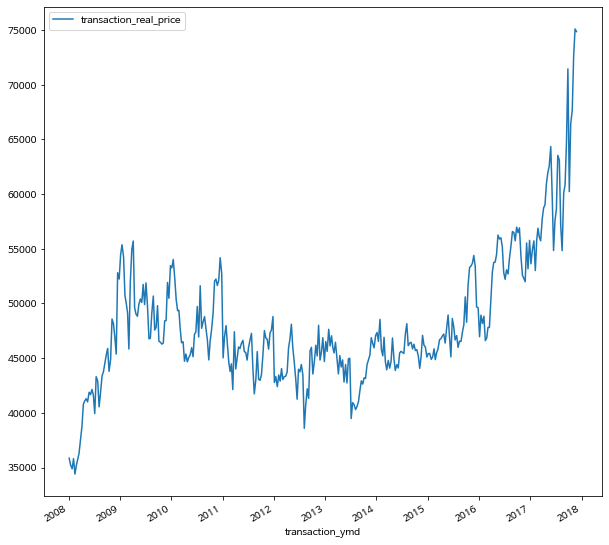

In [ ]:
feature_col = before_covid.columns
feature_col = feature_col.drop(['transaction_ymd'])

before_covid = before_covid.groupby('transaction_ymd')[feature_col].mean().reset_index()
before_covid['transaction_ymd'] = pd.to_datetime(before_covid['transaction_ymd'].astype('str'))
before_covid = before_covid.sort_values(by=['transaction_ymd'])
before_covid = before_covid.set_index('transaction_ymd')

before_covid[['transaction_real_price']].plot(subplots=True, figsize = (10,10))
plt.show()

여기서 2016년 이후 그래프가 급격하게 증가하고 있는 것을 확인할 수 있어요!    

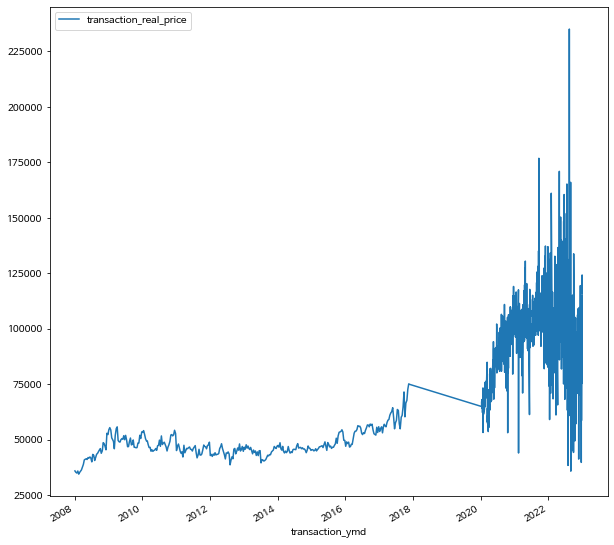

In [ ]:
df_time[['transaction_real_price']].plot(figsize = (10,10))
plt.show()

2016년과 2020년을 비교했을 때, 실거래가가 크게 증가한 것을 보여주고 있어요!   
그렇다면, 이러한 변화가 나타난 이유는 무엇일까요?    
저희는 이런 현상의 이유로 정책의 변화를 생각했습니다 🤔    
2016년과 2020년, 2022년 모두 아파트 가격의 경향성이 바뀌는 지점입니다.    
해당 연도는 부동산 정책에 큰 변화가 있는 해입니다!    
- ['10대 이슈'로 돌아보는 2016년 부동산 시장](https://www.hankyung.com/realestate/article/201612088706e)
- [[정책브리핑] 부동산 정책(2018.12~2022.04)](https://www.korea.kr/special/policyCurationView.do?newsId=148865571)     

이를 고려해보면 정량적인 데이터만으로도 설명할 수 없는 부분이 존재하는 것을 확인할 수 있었네요 😀   



여기까지 아파트 실거래가 예측 프로젝트가 끝났습니다!    
재미있게 학습하셨을까요?    

<img src='http://drive.google.com/uc?export=view&id=1lM7RHqHTrnwciZv0qYq209j_TrFWyO1D' /><br>



데이터로 미래를 예측하는 것은 멋있고, 기대되는 일이라고 생각해요~ 😎    

데이터 분석의 세계로 오신 여러분을 진심으로 환영하며, 프로젝트를 마치겠습니다!    
스테이지 동안 고생 많으셨어요~ 👏
